In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Setup
PROJECT_ROOT = Path.cwd().parent
RAW_DATA_PATH = PROJECT_ROOT / "data/raw"

sys.path.append(str(PROJECT_ROOT))
from src.spellchecker.data.parsers.pile_parser import PileCorpusParser

#### Load the raw typos into DataFrame format

In [2]:
parser = PileCorpusParser(target_sample=60000)
df: pd.DataFrame = parser.download_and_parse()

Resolving data files:   0%|          | 0/30 [00:00<?, ?it/s]

Sampling passages: 100%|██████████| 60000/60000 [00:04<00:00, 13621.23it/s]


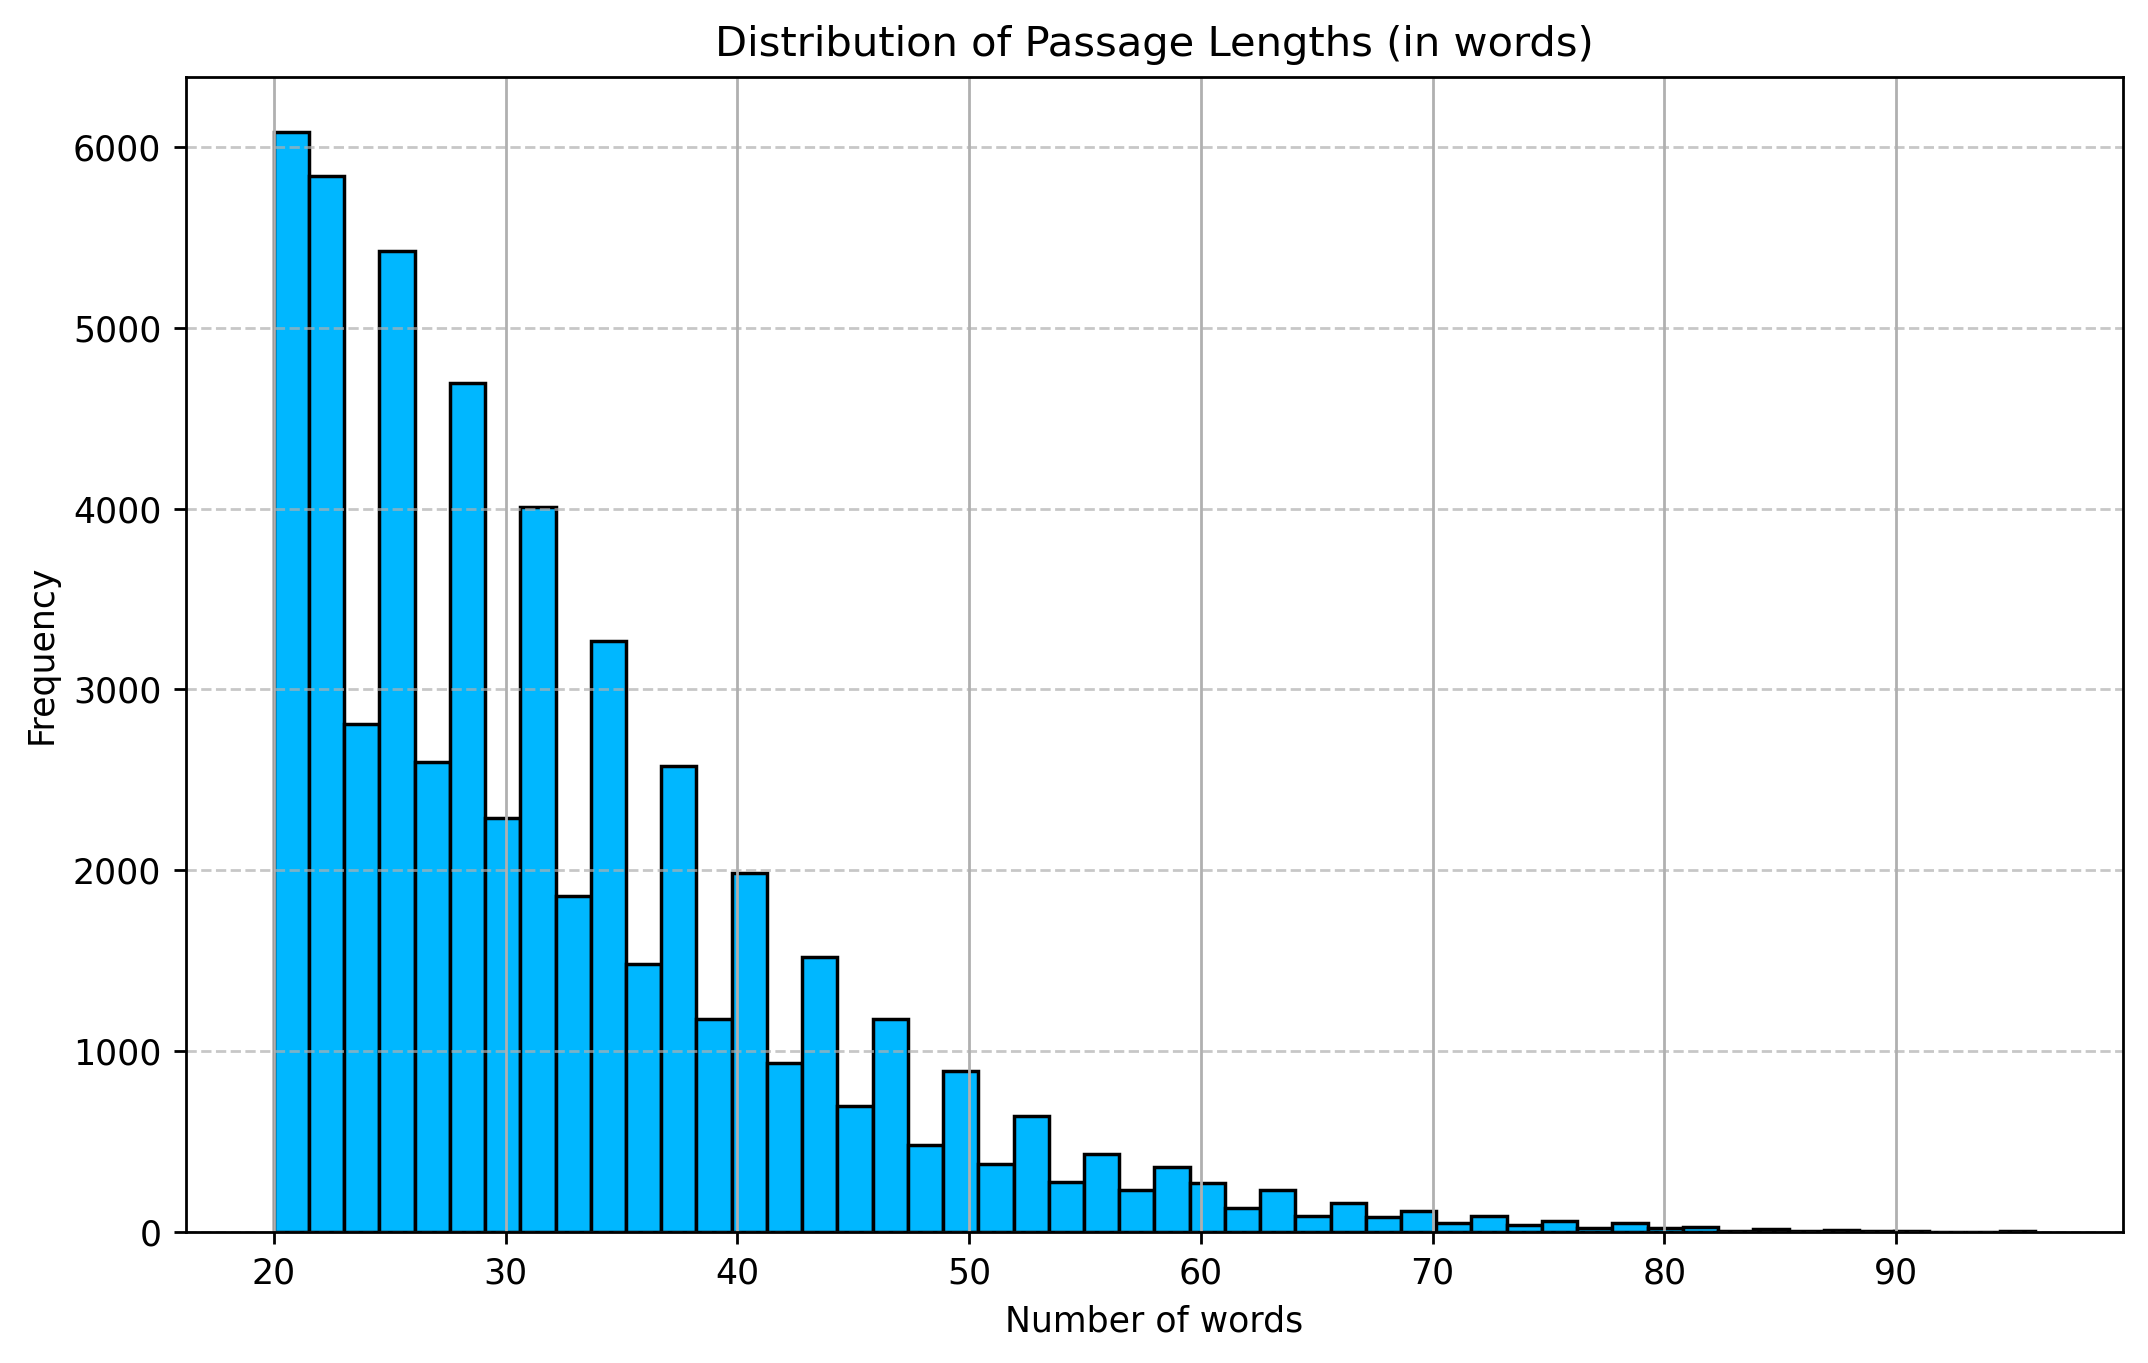

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=250)
df['num_words'].hist(bins=50, color="#00b7ff", edgecolor='black')
plt.title("Distribution of Passage Lengths (in words)")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
print(f"Length of Dataframe: {len(df)}")

Length of Dataframe: 55574


#### Let's split the data into two subsamples:

1. **LLM-corrupted sample**  
   - This sample will be corrupted using a large language model (LLM) to simulate natural spelling, punctuation, and case errors.

2. **Heuristics-corrupted sample**  
   - This sample will be corrupted manually using heuristic rules, such as:
     - Character-level insertions, deletions, and substitutions  
     - Random deletion or addition of spaces  
     - Case alterations  
     - Simple punctuation errors

<Axes: >

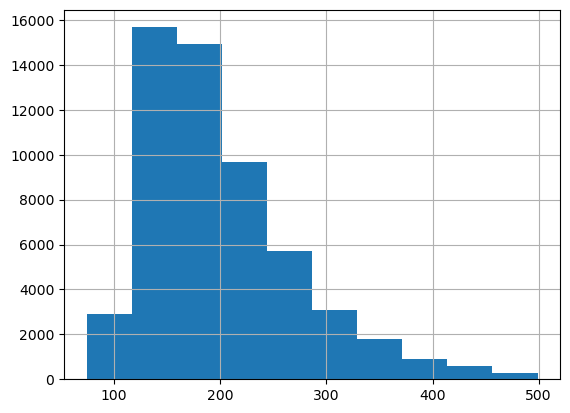

In [5]:
df['passage'].apply(len).hist()

In [9]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
mid = len(df) // 2

# Сохраняем с переименованием колонки
df.iloc[:mid][['passage']].rename(columns={'passage': 'target_text'}).to_csv(
    "unsupervised_pile_llm.csv", index=False
)
df.iloc[mid:][['passage']].rename(columns={'passage': 'target_text'}).to_csv(
    "unsupervised_pile_heuristics.csv", index=False
)

print(f"LLM: {mid} passages, Heuristics: {len(df)-mid} passages")

LLM: 27787 passages, Heuristics: 27787 passages


In [10]:
df = pd.read_csv("/Users/chrnegor/Documents/study/MLDL/SpellChecker/data/processed/unsupervised_pile_llm.csv")

In [11]:
df

,target_text
0,*terreus* in response to frequent subculturing...
1,The guest speaker will be a representative of ...
2,If everyone would have their CYP2D6 gene teste...
3,I think you're on the right track with this. I...
4,The difference of course is that my time is pr...
...,...
27603,The result is an enrichment of HDL and LDL par...
27604,"Which, is patently absurd.12 --> Instead, we u..."
27605,I pay for my products just like you do...and I...
27606,"The destruction of the America city, beginning..."
